# Чекпоинт 2: EDA

## 0. Установка зависимостей и скачивание датасета (Stanford Cars Dataset)

In [ ]:
#Зависимости и функции из eda_utils.py
import os
from ipywidgets import interact

from eda_utils import (
    map_to_general_category, load_and_process,
    plot_counts, plot_sizes,
    get_image_path, show_image_with_annotation
)

# Глобальные пути к изображениям
train_images_path = None
test_images_path = None

In [ ]:
#Скачиваем датасет

#1. Установим gdown
!pip install --quiet --upgrade gdown

#2. Скачаем zip по ID из Drive
!gdown --id 13OKSjDCwitFk022HJJ1cugJyb-46dka5 -O /content/stanford_cars_dataset.zip

#3. Распакуем архив
!unzip -q /content/stanford_cars_dataset.zip -d /content/

#4. И удалим сам zip, чтобы оптимизировать место
!rm /content/stanford_cars_dataset.zip

#Теперь вся папка будет доступна локально

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=13OKSjDCwitFk022HJJ1cugJyb-46dka5
From (redirected): https://drive.google.com/uc?id=13OKSjDCwitFk022HJJ1cugJyb-46dka5&confirm=t&uuid=307ad5e6-331d-45c6-b318-192a9dda79df
To: /content/stanford_cars_dataset.zip
100% 2.00G/2.00G [00:26<00:00, 74.4MB/s]


## 1. Сбор, подготовка данных, обобщение в меньшее кол-во классов (196 -> 9)

In [ ]:
#Пути к разметке для train и test (.csv файлы с подробной информацией об объектах)
train_labels_path = 'https://drive.google.com/uc?export=download&id=1Wh-NCRjBbONPL6kjs55jWvtyPdTwWdYi'
test_labels_path = 'https://drive.google.com/uc?export=download&id=1g0AQ8Gtku3EDjdCNqJLb3ewzJJoLZbOG'

#Пути к фото для train и test
global train_images_path, test_images_path
train_images_path = os.path.join('/content/stanford_cars_dataset', 'train', 'images')
test_images_path  = os.path.join('/content/stanford_cars_dataset', 'test',  'images')

#Обобщение в категории
general_categories = {
    'Sedan': ['Sedan'],
    'SUV': ['SUV'],
    'Coupe': ['Coupe'],
    'Convertible': ['Convertible'],
    'Hatchback': ['Hatchback'],
    'Minivan': ['Minivan'],
    'Van': ['Van'],
    'Truck': ['Crew Cab', 'Extended Cab', 'Regular Cab'],
}

In [ ]:
df_train = load_and_process(train_labels_path, general_categories)
df_test  = load_and_process(test_labels_path, general_categories)

In [ ]:
print(f"Кол-во классов уменьшилось с {df_train['class_name'].nunique()} до {df_train['general_class_name'].nunique()}")

Кол-во классов уменьшилось с 196 до 9


In [ ]:
df_train.head()

,boxx_1,boxy_1,boxx_2,boxy_2,class,file_name,class_name,general_class_name,general_class
0,39,116,569,375,14,00001.jpg,Audi TTS Coupe 2012,Coupe,1
1,36,116,868,587,3,00002.jpg,Acura TL Sedan 2012,Sedan,2
2,85,109,601,381,91,00003.jpg,Dodge Dakota Club Cab 2007,Other,3
3,621,393,1484,1096,134,00004.jpg,Hyundai Sonata Hybrid Sedan 2012,Sedan,2
4,14,36,133,99,106,00005.jpg,Ford F-450 Super Duty Crew Cab 2012,Truck,4


In [ ]:
df_test.head()

,boxx_1,boxy_1,boxx_2,boxy_2,class,file_name,class_name,general_class_name,general_class
0,30,52,246,147,181,00001.jpg,Suzuki Aerio Sedan 2007,Sedan,1
1,100,19,576,203,103,00002.jpg,Ferrari 458 Italia Convertible 2012,Convertible,2
2,51,105,968,659,145,00003.jpg,Jeep Patriot SUV 2012,SUV,3
3,67,84,581,407,187,00004.jpg,Toyota Camry Sedan 2012,Sedan,1
4,140,151,593,339,185,00005.jpg,Tesla Model S Sedan 2012,Sedan,1


## 2. Анализ

### 2.1 Анализ распределения классов

In [ ]:
#Раcпределения объектов по классам в train и test

df_train.groupby('general_class_name').agg({'general_class_name' : 'count'})

,general_class_name
general_class_name,
Convertible,1005
Coupe,1119
Hatchback,554
Minivan,250
Other,945
SUV,1437
Sedan,1907
Truck,636
Van,291


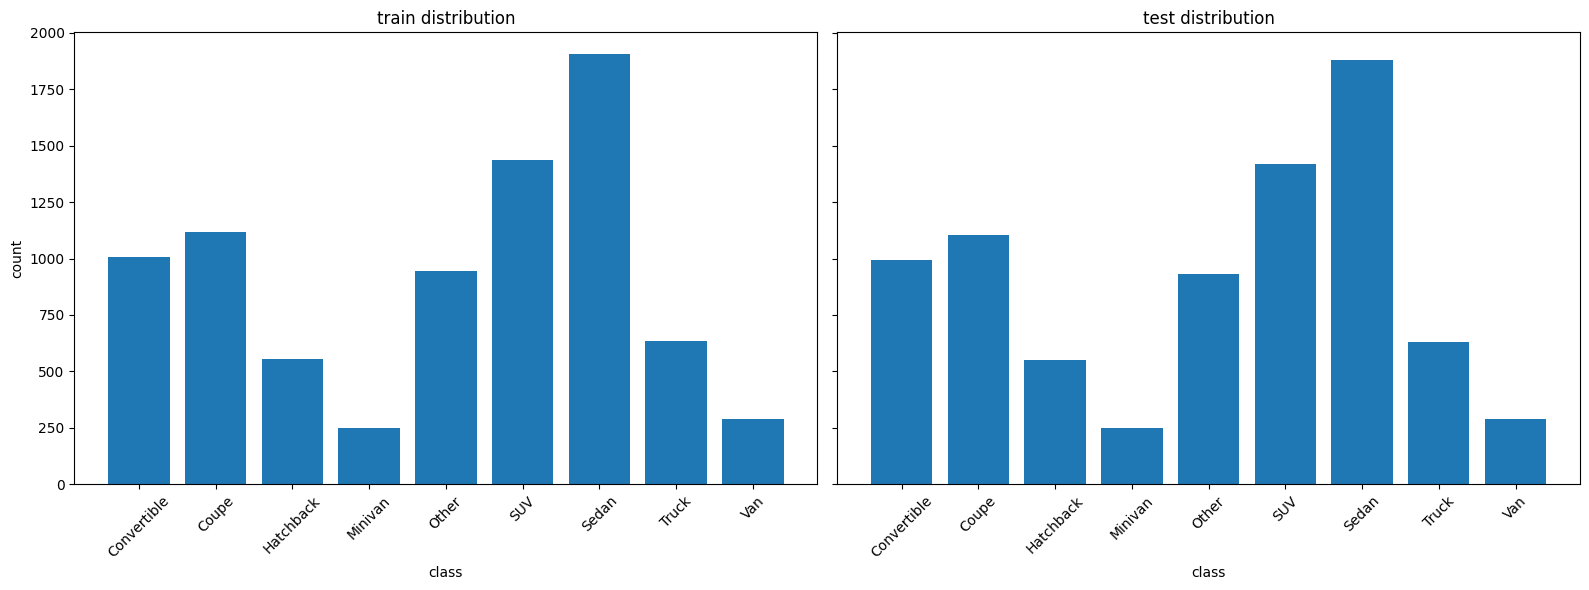

In [ ]:
#Отображение раcпределения объектов по классам в train и test

plot_counts([df_train, df_test], ['train', 'test'])

### 2.2 Анализ размера объектов

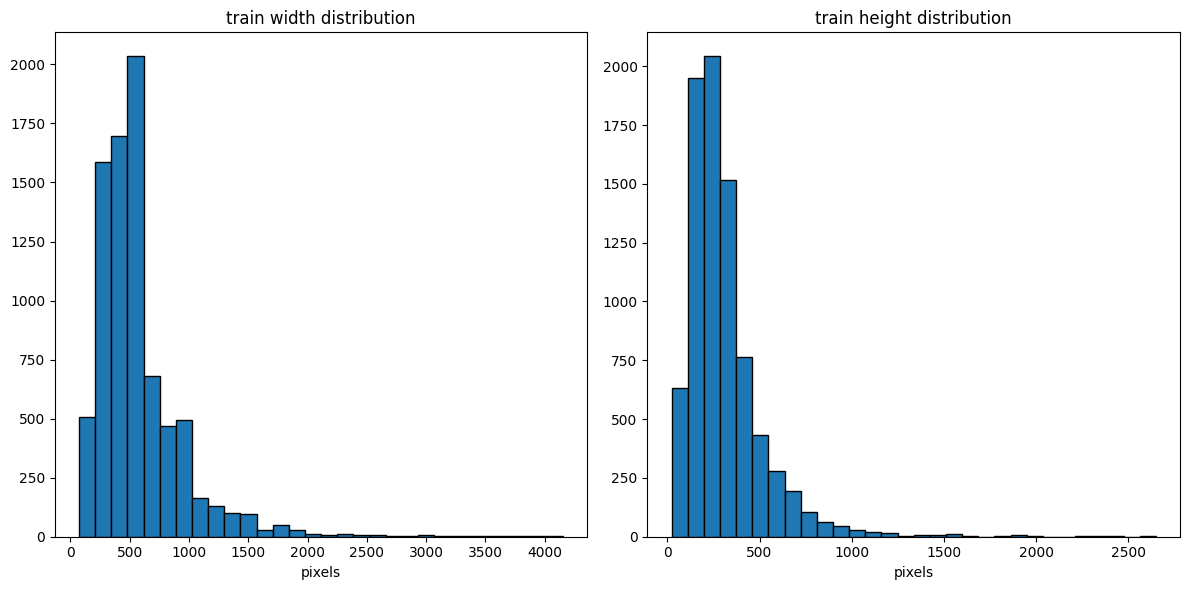

In [ ]:
#Отображение размерности объектов train

plot_sizes(df_train, 'train')

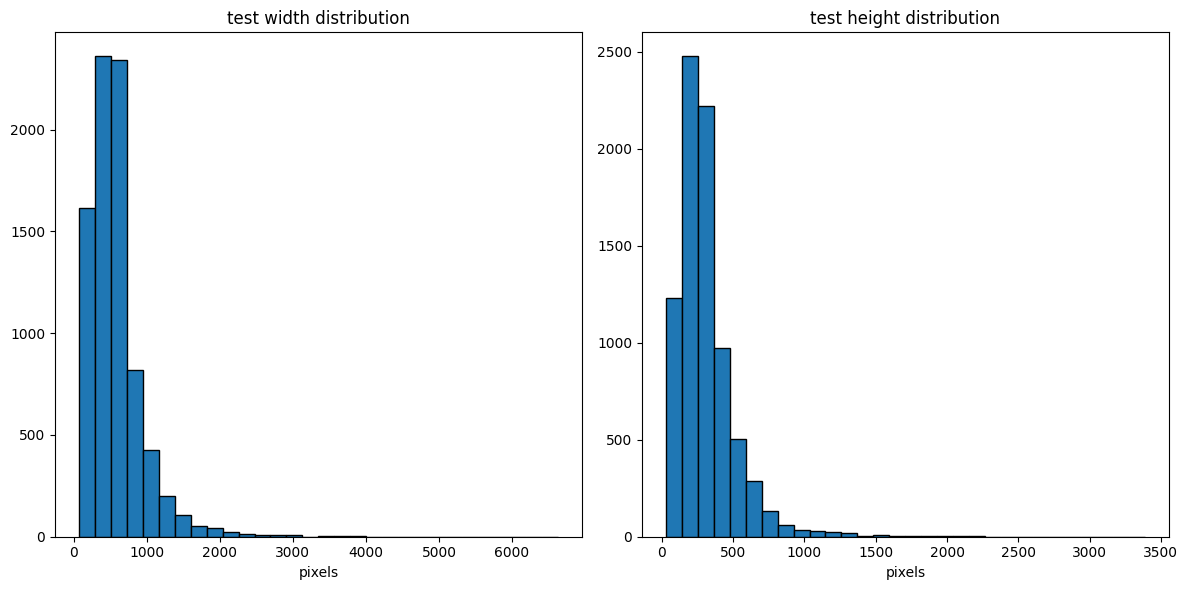

In [ ]:
#Отображение размерности объектов test

plot_sizes(df_test, 'test')

## 3. Визуализация аннотаций

In [ ]:
#Создаем слайдеры для train

print("Train Set Visualization:")
interact(
    lambda idx: show_image_with_annotation(idx, df_train, train_images_path),
    idx=(0, len(df_train)-1)
)

Train Set Visualization:


interactive(children=(IntSlider(value=4071, description='idx', max=8143), Output()), _dom_classes=('widget-int…

<function __main__.<lambda>(idx)>

In [ ]:
#Создаем слайдеры для test

print("Test Set Visualization:")
interact(
    lambda idx: show_image_with_annotation(idx, df_test, test_images_path),
    idx=(0, len(df_test)-1)
)

Test Set Visualization:


interactive(children=(IntSlider(value=4020, description='idx', max=8040), Output()), _dom_classes=('widget-int…